In [2]:
using Plots
using Flux

# 物理　第1編　第4章 第1節　等速円運動　(p64)

## 角速度

物体が円周上を一定の速さで回ることを等速円運動と呼ぶ。

円運動する物体について、「単位時間あたりにどれくらいの角度回るか？」という尺度が考えられる。

Plots.AnimatedGif("/var/folders/b5/z2qg52p549x8sbr6138wf9w00000gn/T/jl_54D0pQL652.gif")
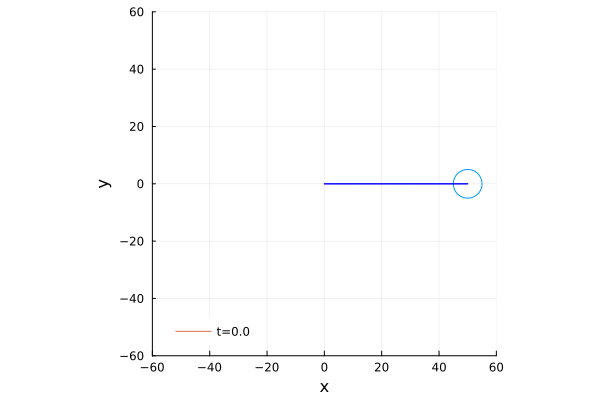

In [29]:
# 角速度の大きい等速縁運動とそうでない円運動を見せる
om = 1.0 # 角速度
R = 50# 軌道半径
T = 2*π/om
fx(t) = R*cos(om*t) # x,y成分の軌道の時間の式 
fy(t) = R*sin(om*t)
vx(t) = fx'(t) #速度の式を軌道の式からつくる
vy(t) = fy'(t)
ts = range(0,T,step=1/20) # 時間
xs = fx.(ts)
ys = fy.(ts)
xvs= vx.(ts)
yvs= vy.(ts) # 軌道・速度の時系列データを計算
ts=round.(ts,digits=3)
theta = range(0,2π,step=0.01)#　質点描画
r = 5 # 質点の半径
anim = Animation()
for i in 1:length(ts)
    plt=plot(xs[i] .+r*cos.(theta),ys[i].+r*sin.(theta),aspectratio=1,xlims=(-60,60),ylims=(-60,60),label="",xlabel="x",ylabel="y") # 質点のプロット
    plt=plot!(xs[1:i],ys[1:i],label="t=$(ts[i])",legend = :bottomleft,foreground_color_legend = :white) # 起動のプロット
    plt=plot!([0,xs[i]],[0,ys[i]],label="",linecolor=:blue) # 回転中心と質点を結ぶ直線
    plt=plot!([0,R],[0,0],label="",linecolor=:blue ) # 回転中心と質点を結ぶ直線
    #plt=plot!([xs[i],xs[i]+xvs[i]], [ys[i],ys[i]+yvs[i]], arrow = arrow(),label="v") # 速度のプロット
    #plt=plot!([xs[i],xs[i]], [ys[i],ys[i]+yvs[i]], arrow = arrow(),label="vy") # 速度のx成分のプロット
    #plt=plot!([xs[i],xs[i]+xvs[i]], [ys[i],ys[i]], arrow = arrow(),label="vx") # 速度のy成分のプロット
    frame(anim,plt)
end
gif(anim,fps=20)